In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017

Correr siguiente celda para repetir toda la simulación

In [ ]:
#import multiprocessing
#from joblib import delayed, Parallel

#Parallel(n_jobs=multiprocessing.cpu_count()-1)(delayed(solar_year)(country,year) for country in paises for year in years)

Correr siguiente celda para leer archivos existentes de simulación anterior

In [ ]:
#todo = {}
#for year in years:
#    for country in paises:
#        todo[country+str(year)]=pd.read_csv('../Archivos/Output/'+country+str(year)+'.csv',parse_dates=[0])
#        todo[country+str(year)].set_index('time',inplace=True)
#        todo[country+str(year)]=todo[country+str(year)]/1000            ## Convertir a GW

Correr siguiente celda para integrar todos los datos en un único df

In [ ]:
#df = pd.concat([todo['Spain2008'],todo['Germany2008']],axis=1)

#for year in years[1:]:
#    df_aux = pd.concat([todo['Spain'+str(year)],todo['Germany'+str(year)]],axis=1)
#    df = pd.concat([df,df_aux])
    
#df.to_csv('../Archivos/Output/Combinado.csv')

Lectura del df único

In [2]:
def leer():
    df = pd.read_csv('../Archivos/Output/Combinado.csv',parse_dates=[0])
    df = df[(df['time'] < '2018-01-01')]
    df.set_index('time',inplace=True)
    df.index.drop_duplicates(keep=False)
    return (df)

In [3]:
df = leer()

In [4]:
df.loc['2010-08-12']

,Spain,Germany
time,,
2010-08-12 00:00:00,0.000000,0.000000
2010-08-12 01:00:00,0.000000,0.000000
2010-08-12 02:00:00,0.000000,0.000000
2010-08-12 03:00:00,0.000000,0.000000
2010-08-12 04:00:00,0.000000,0.000000
2010-08-12 05:00:00,0.000000,0.010913
2010-08-12 06:00:00,0.001907,0.070881
2010-08-12 07:00:00,0.069702,0.179222
2010-08-12 08:00:00,0.262645,0.300228


Gráfica tres días aleatorios de producción

In [5]:
def tres_random(df,pais):
    df['doy'] = df.index.dayofyear
    df['tiempo']=df.index.time
    df['Year'] = df.index.year
    df['ind']= df['doy'].astype(str)+"-"+ df['tiempo'].astype(str)
    df['ind']=pd.to_datetime(df['ind'],format='%j-%H:%M:%S')
    piv = pd.pivot_table(df, index=['ind'],columns=['Year'], values=[pais])
    piv = piv[(piv.index <'1901-01-01')]
    mes = np.random.choice(list(piv.index.month.unique()))
    aux = piv[piv.index.month==mes]
    split = np.array_split(aux,10)
    x = np.random.choice(range(10))
    titulo = pais+"\n"+ str(calendar.month_name[mes])
    split[x].plot(title = titulo,figsize=(20,7),xlabel = 'Date',ylabel='Solar Power [GW]', ls='--')
    plt.legend(title = "País:")
    plt.show()
    plt.close()

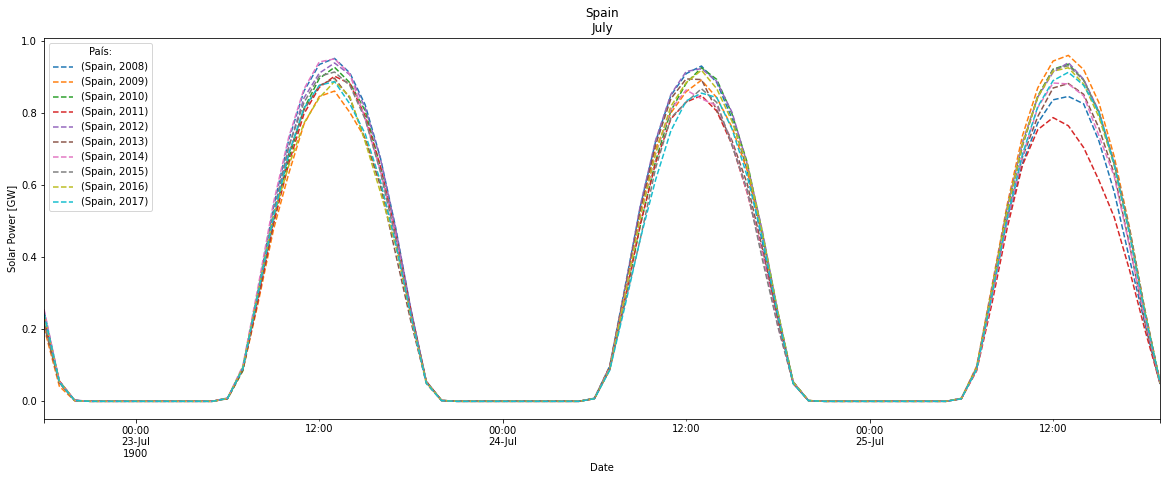

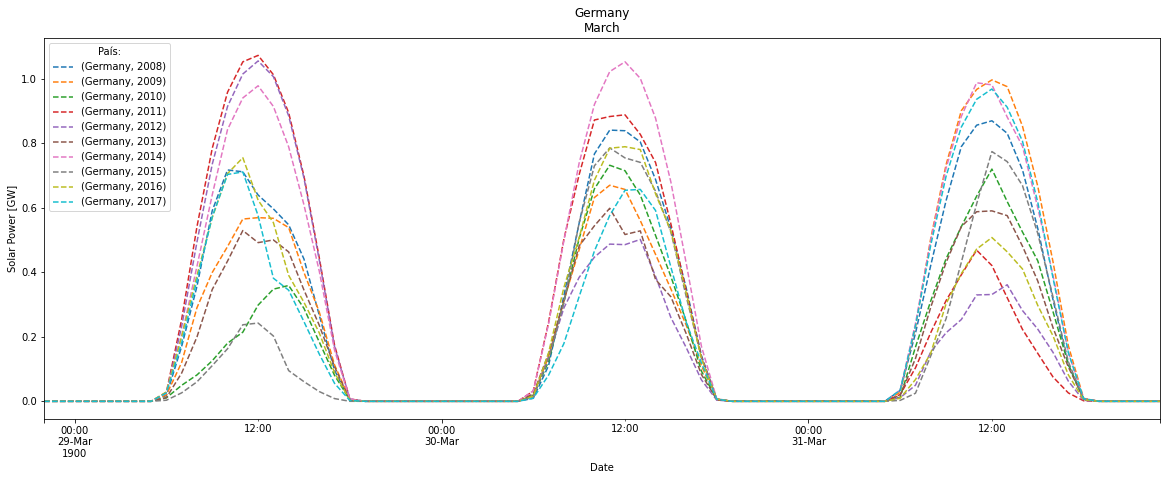

In [6]:
for pais in paises:
    tres_random(df,pais)

Obtención de estadísticas descriptivas de producción total en los diez años

In [7]:
df = leer()

In [8]:
def descriptivas(df,pais):
    pais_1 = df[pais]
    total = {}
    for year in years:
        total[str(year)] = pais_1.loc[str(year)].sum()
    sumas = pd.DataFrame.from_dict(total,orient='index')
    titulo  = 'GWh ' + pais
    sumas.rename(columns={0:titulo},inplace=True)
    return(sumas)

In [9]:
spa = descriptivas(df,'Spain')
spa

,GWh Spain
2008,2012.569220
2009,2068.497769
2010,1972.003100
2011,2057.090720
2012,2105.052562
2013,2028.475450
2014,2000.478708
2015,2067.116762
2016,2012.581051
2017,2132.433017


In [10]:
spa.describe()

,GWh Spain
count,10.000000
mean,2045.629836
std,49.576938
min,1972.003100
25%,2012.572178
50%,2042.783085
75%,2068.152517
max,2132.433017


In [11]:
ger = descriptivas(df,'Germany')
ger

,GWh Germany
2008,1474.065860
2009,1483.227915
2010,1449.498471
2011,1594.108377
2012,1526.017762
2013,1406.765194
2014,1510.099366
2015,1550.228983
2016,1499.200884
2017,1474.287475


In [12]:
ger.describe()

,GWh Germany
count,10.000000
mean,1496.750029
std,52.611177
min,1406.765194
25%,1474.121264
50%,1491.214399
75%,1522.038163
max,1594.108377


Producción agregada de cada mes del calendario

In [13]:
def suma_mes(country,mes):
    prueba = leer()
    prueba['Month']=prueba.index.month
    prueba['Year']=prueba.index.year
    month_of_interest = prueba.loc[prueba['Month']==mes]
    sumas = {}
    for year in years:
        sumas[year] = month_of_interest.loc[month_of_interest['Year']==year][country].sum()
    return(sumas)

In [14]:
def produccion_por_mes(country):
    indices =[]
    lows = []
    highs = []

    anual = descriptivas(leer(),country)
    anual = (anual,)
    intervalo_std = stats.bootstrap(anual,np.mean,confidence_level=0.95)
    indice = 'Total'
    low =np.round(intervalo_std.confidence_interval.low,6)[0]
    high = np.round(intervalo_std.confidence_interval.high,6)[0]
    indices.append(indice)
    lows.append(low)
    highs.append(high)

    for mes in range(1,13):
        suma = suma_mes(country,mes)
        aux = []
        for value in suma.values():
            aux.append(value)
        aux = (aux,)
        intervalo_std = stats.bootstrap(aux,np.mean,confidence_level=0.95)
        indice = calendar.month_name[mes]
        low =intervalo_std.confidence_interval.low
        high = intervalo_std.confidence_interval.high
        indices.append(indice)
        lows.append(low)
        highs.append(high)
    
    df = pd.DataFrame({country:indices,'Low [GW]':lows,'High [GW]':highs})
    df.set_index(country,inplace=True)
    return(df)

In [15]:
produccion_por_mes('Spain')

,Low [GW],High [GW]
Spain,,
Total,2018.704105,2076.963107
January,109.293256,128.651439
February,125.735964,146.845769
March,169.721200,190.660330
April,186.695363,199.091833
May,200.483251,213.769802
June,204.274616,209.650374
July,218.585892,222.380523
August,209.601429,215.194965


In [16]:
produccion_por_mes('Germany')

,Low [GW],High [GW]
Germany,,
Total,1467.875018,1528.281383
January,51.427796,62.367767
February,75.527327,91.093594
March,130.296487,149.931953
April,164.769265,185.580645
May,167.244083,192.875685
June,170.056614,180.953149
July,171.351943,187.110818
August,161.032440,177.016759


Producción promedio, máx, min y med de un día en cada mes

In [17]:
def Por_mes(Pais,Mes):
    df = leer()
    df['Month']=df.index.month
    df['Time']=df.index.time
    Country = df[[Pais,'Month','Time']]
    mes = Country.loc[Country['Month']== Mes]
    aux = mes.groupby('Time')
    hora =aux[Pais].agg([np.median, lambda x: np.quantile(x,0.75),lambda x: np.quantile(x,0.25)])
    hora.rename(columns={'<lambda_0>':'Perc. 0.75','<lambda_1>':'Perc. 0.25'},inplace=True)
    return(hora)

In [18]:
def cuatrimestre(num_cuatrimestre,num_primer_mes,country):
    import calendar
    df = leer()
    max = df[country].max()
    titulo_sup =country+"\n"+str(num_primer_mes)+" - "+str(num_primer_mes+3)
    plt.figure(figsize=(60,35))
    plt.suptitle(titulo_sup,fontsize=50)

    plt.subplot(2,2,1)

    month_1 = Por_mes(country,num_primer_mes)

    x_axis = month_1.index.astype(str)

    plt.plot(x_axis,month_1['Perc. 0.75'],ls='dashdot',label="Perc. 0.75")
    plt.plot(x_axis,month_1['median'],ls='solid',label="Median")
    plt.plot(x_axis,month_1['Perc. 0.25'],ls='dashed',label="Perc. 0.25")
    titulo = str(calendar.month_name[num_primer_mes])
    plt.title(titulo,fontsize = 35)
    plt.legend(loc='upper left',fontsize='xx-large')
    plt.ylabel('Solar Power [GW]',fontsize = 35)
    plt.xlabel('Hour of day',fontsize=35)
    plt.tick_params(axis='y',labelsize=25)
    plt.minorticks_off()
    plt.ylim(bottom = 0,top = max)

    plt.subplot(2,2,2)

    month_2 = Por_mes(country,num_primer_mes+1)
    plt.plot(x_axis,month_2['Perc. 0.75'],ls='dashdot',label="Perc. 0.75")
    plt.plot(x_axis,month_2['median'],ls='solid',label="Median")
    plt.plot(x_axis,month_2['Perc. 0.25'],ls='dashed',label="Perc. 0.25")
    titulo = str(calendar.month_name[num_primer_mes+1])
    plt.title(titulo,fontsize = 35)
    plt.legend(loc='upper left',fontsize='xx-large')
    plt.ylabel('Solar Power [GW]',fontsize = 35)
    plt.tick_params(axis='y',labelsize=25)
    plt.xlabel('Hour of day',fontsize=35)
    plt.minorticks_off()
    plt.ylim(bottom = 0,top = max)

    plt.subplot(2,2,3)

    month_3 = Por_mes(country,num_primer_mes+2)
    plt.plot(x_axis,month_3['Perc. 0.75'],ls='dashdot',label="Perc. 0.75")
    plt.plot(x_axis,month_3['median'],ls='solid',label="Median")
    plt.plot(x_axis,month_3['Perc. 0.25'],ls='dashed',label="Perc. 0.25")
    titulo = str(calendar.month_name[num_primer_mes+2])
    plt.title(titulo,fontsize = 35)
    plt.legend(loc='upper left',fontsize='xx-large')
    plt.ylabel('Solar Power [GW]',fontsize = 35)
    plt.tick_params(axis='y',labelsize=25)
    plt.xlabel('Hour of day',fontsize=35)
    plt.minorticks_off()
    plt.ylim(bottom = 0,top = max)

    plt.subplot(2,2,4)

    month_4 = Por_mes(country,num_primer_mes+3)
    plt.plot(x_axis,month_4['Perc. 0.75'],ls='dashdot',label="Perc. 0.75")
    plt.plot(x_axis,month_4['median'],ls='solid',label="Median")
    plt.plot(x_axis,month_4['Perc. 0.25'],ls='dashed',label="Perc. 0.25")
    titulo = str(calendar.month_name[num_primer_mes+3])
    plt.title(titulo,fontsize = 35)
    plt.legend(loc='upper left',fontsize='xx-large')
    plt.ylabel('Solar Power [GW]',fontsize = 35)
    plt.tick_params(axis='y',labelsize=25)
    plt.xlabel('Hour of day',fontsize=35)
    plt.minorticks_off()
    plt.ylim(bottom = 0,top = max)
    
    plt.show()

Gráficas por mes

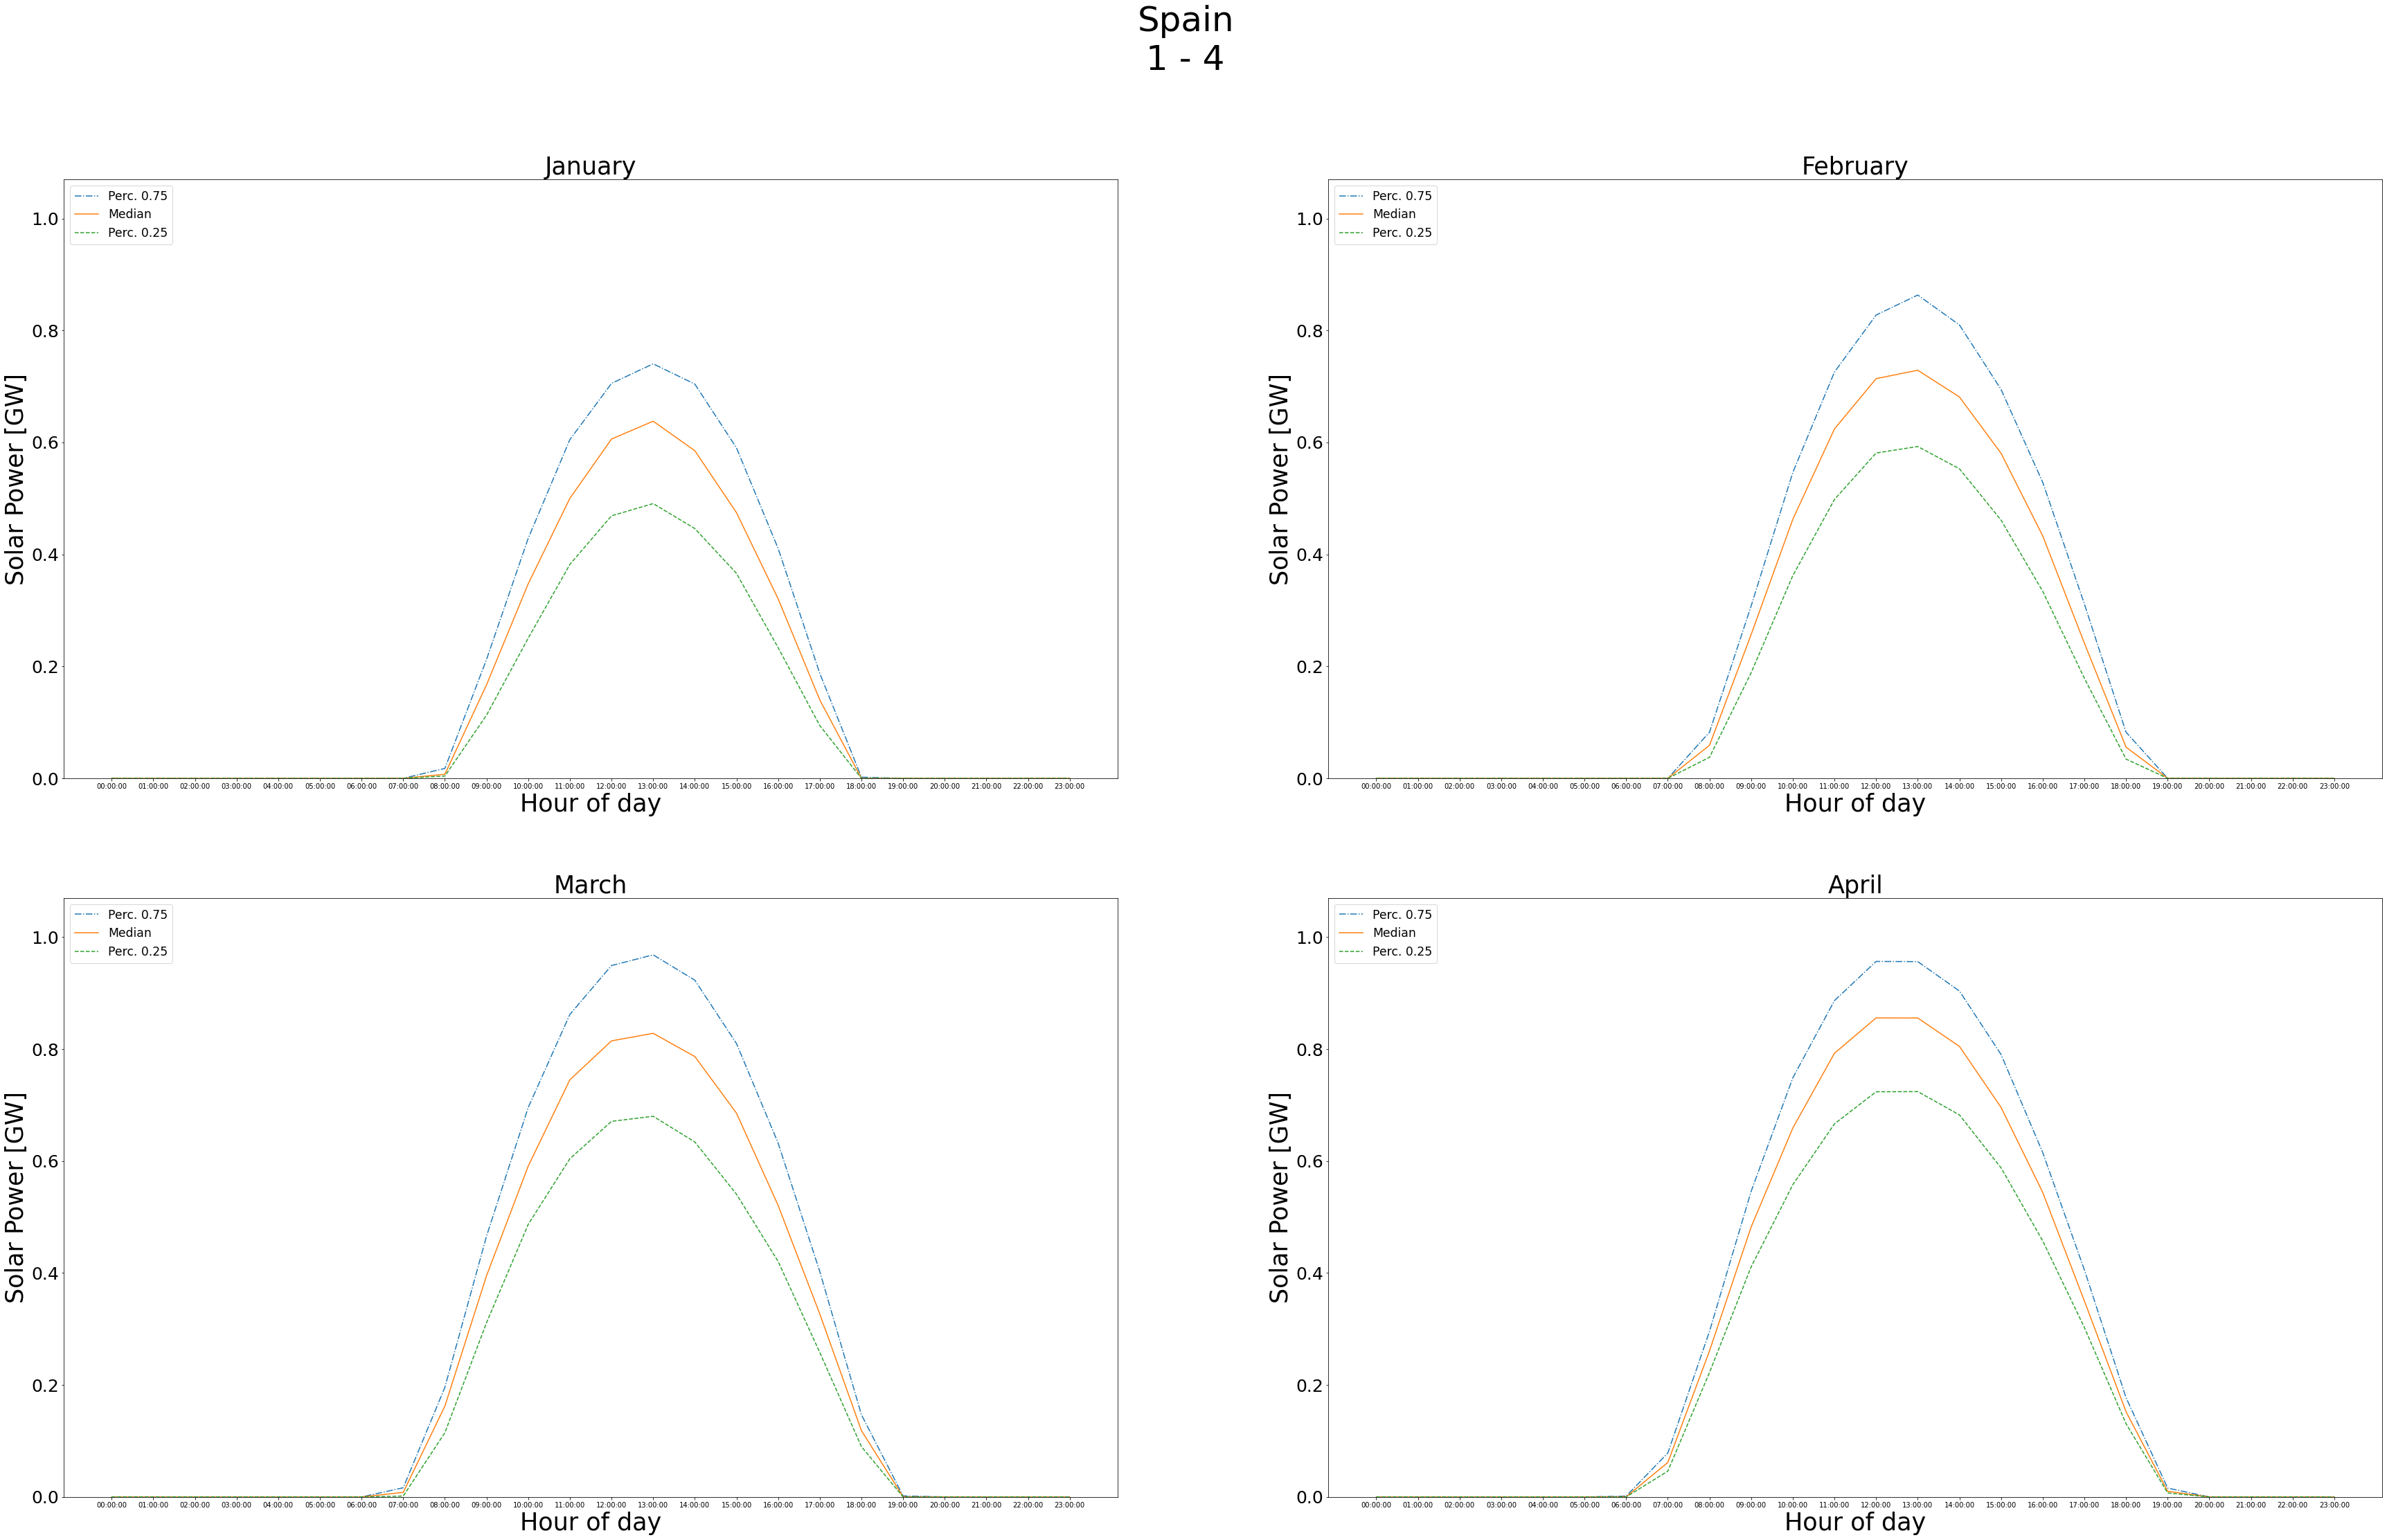

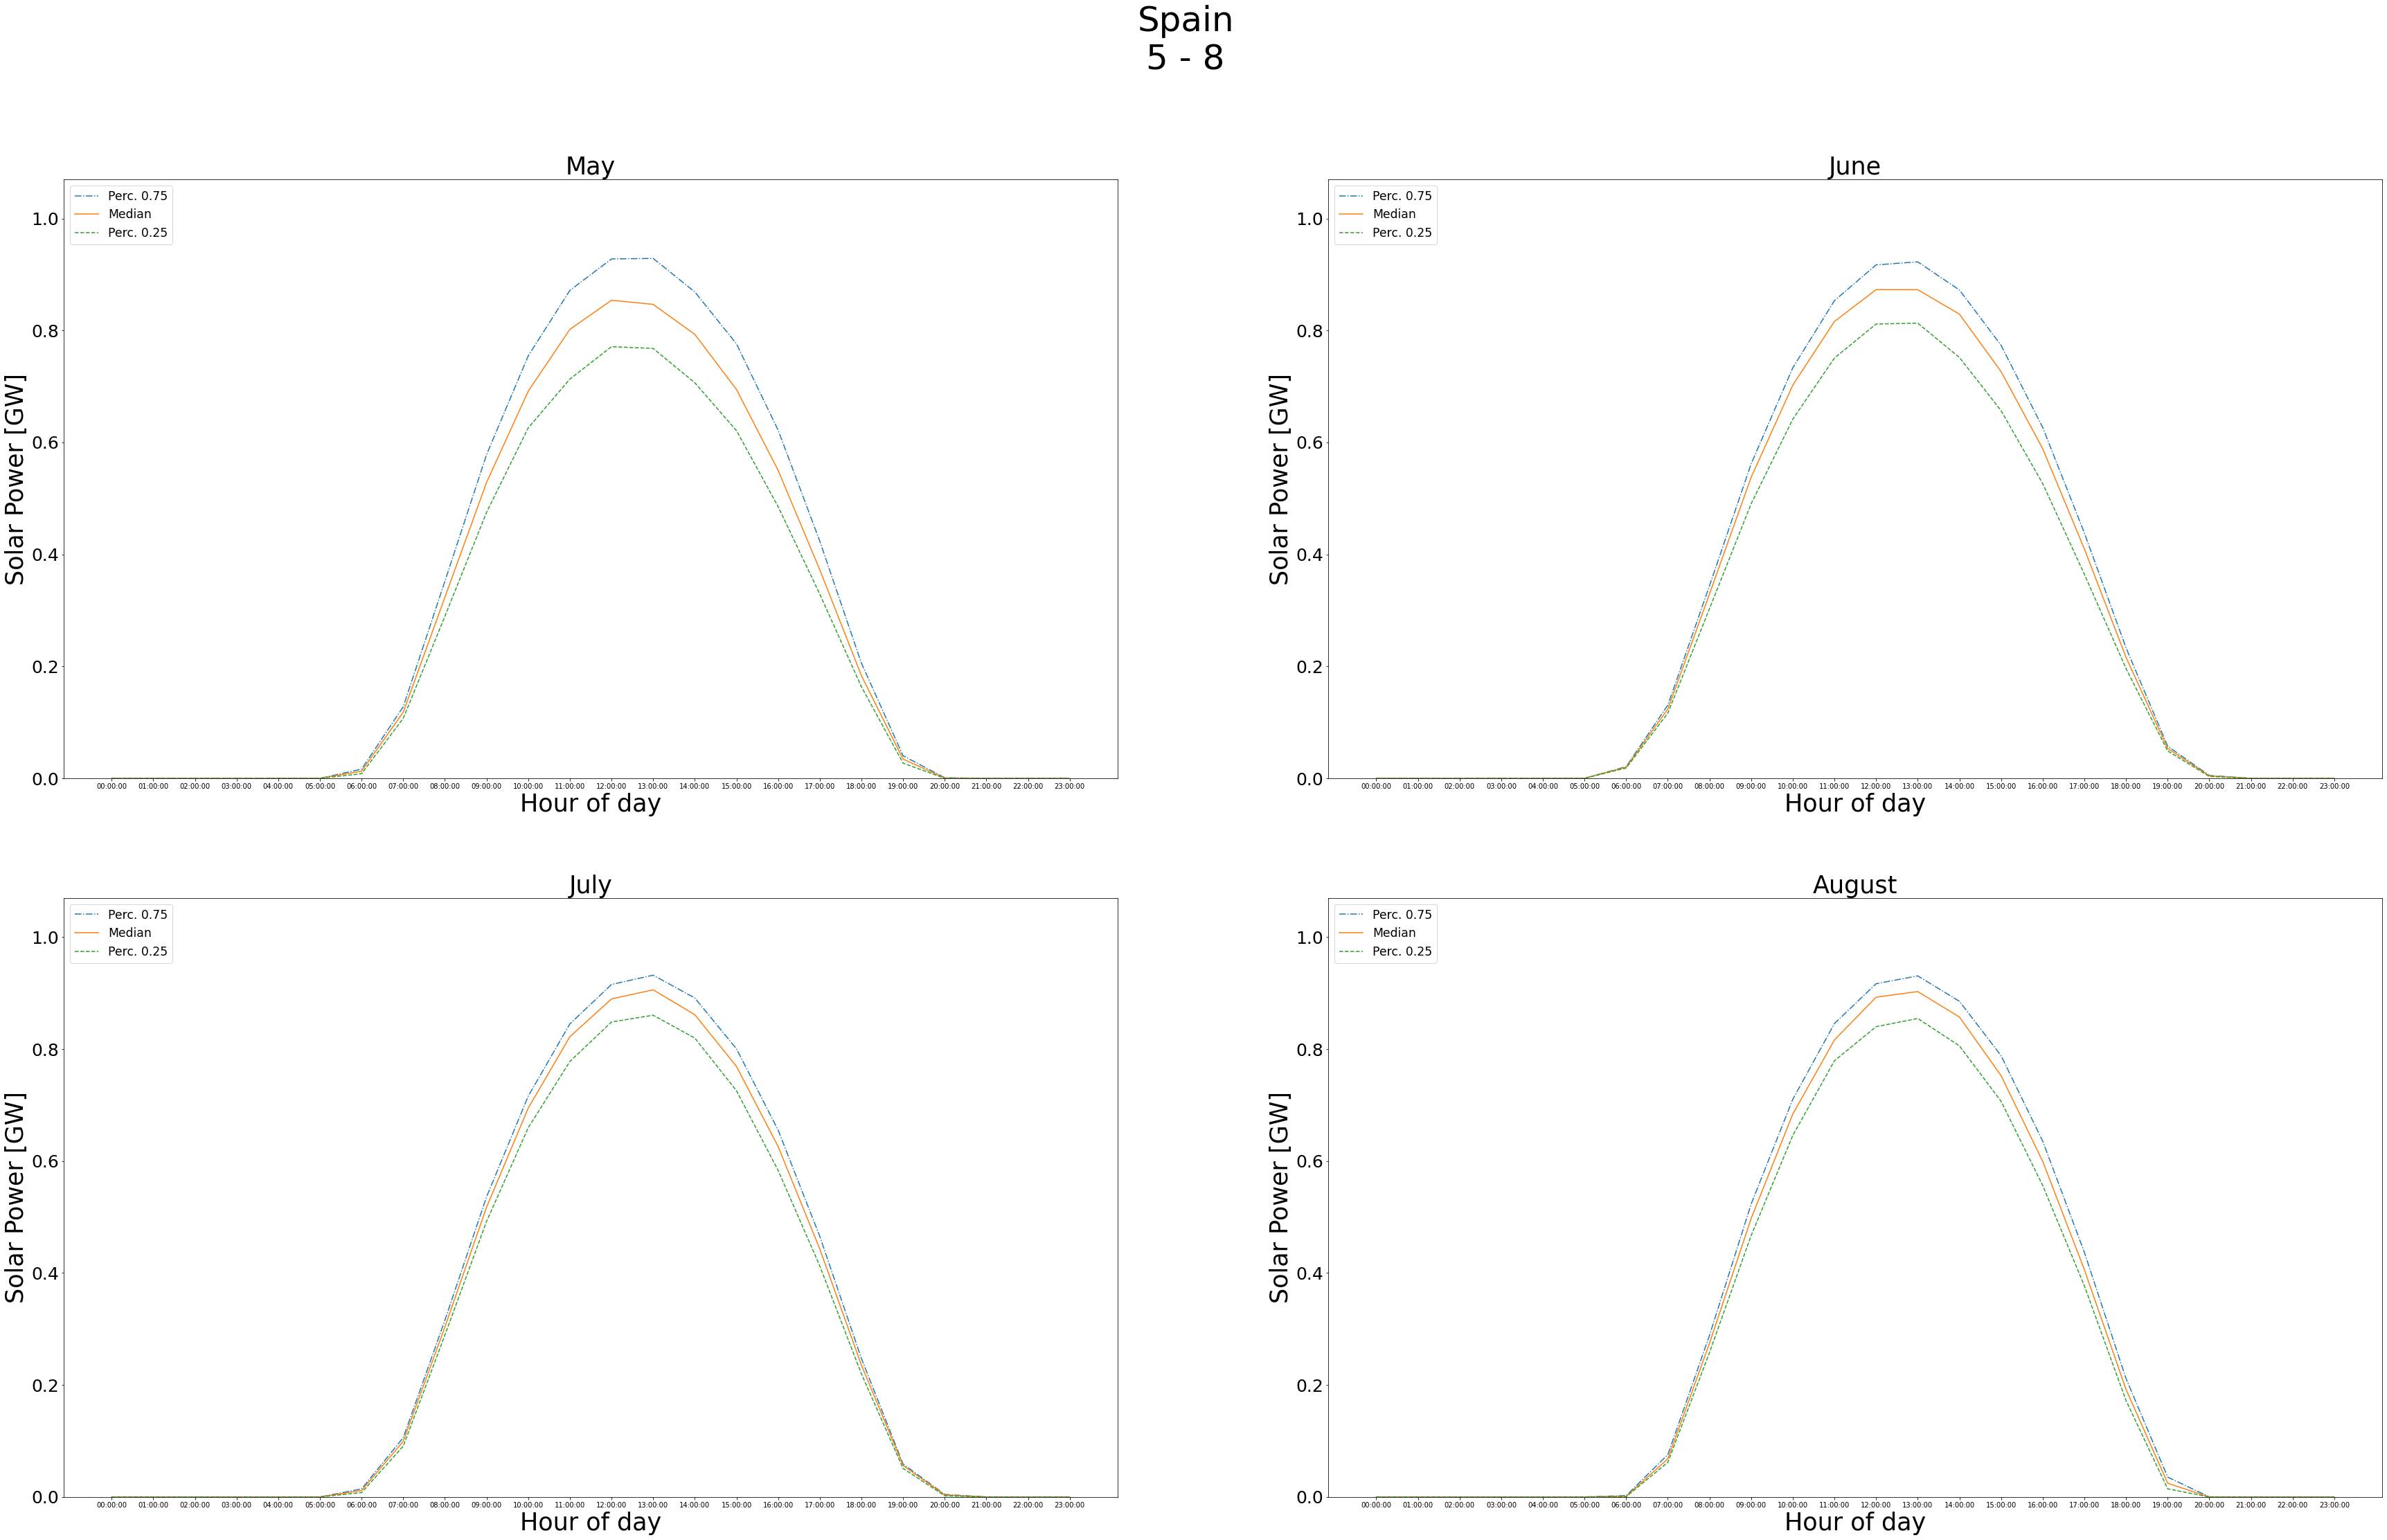

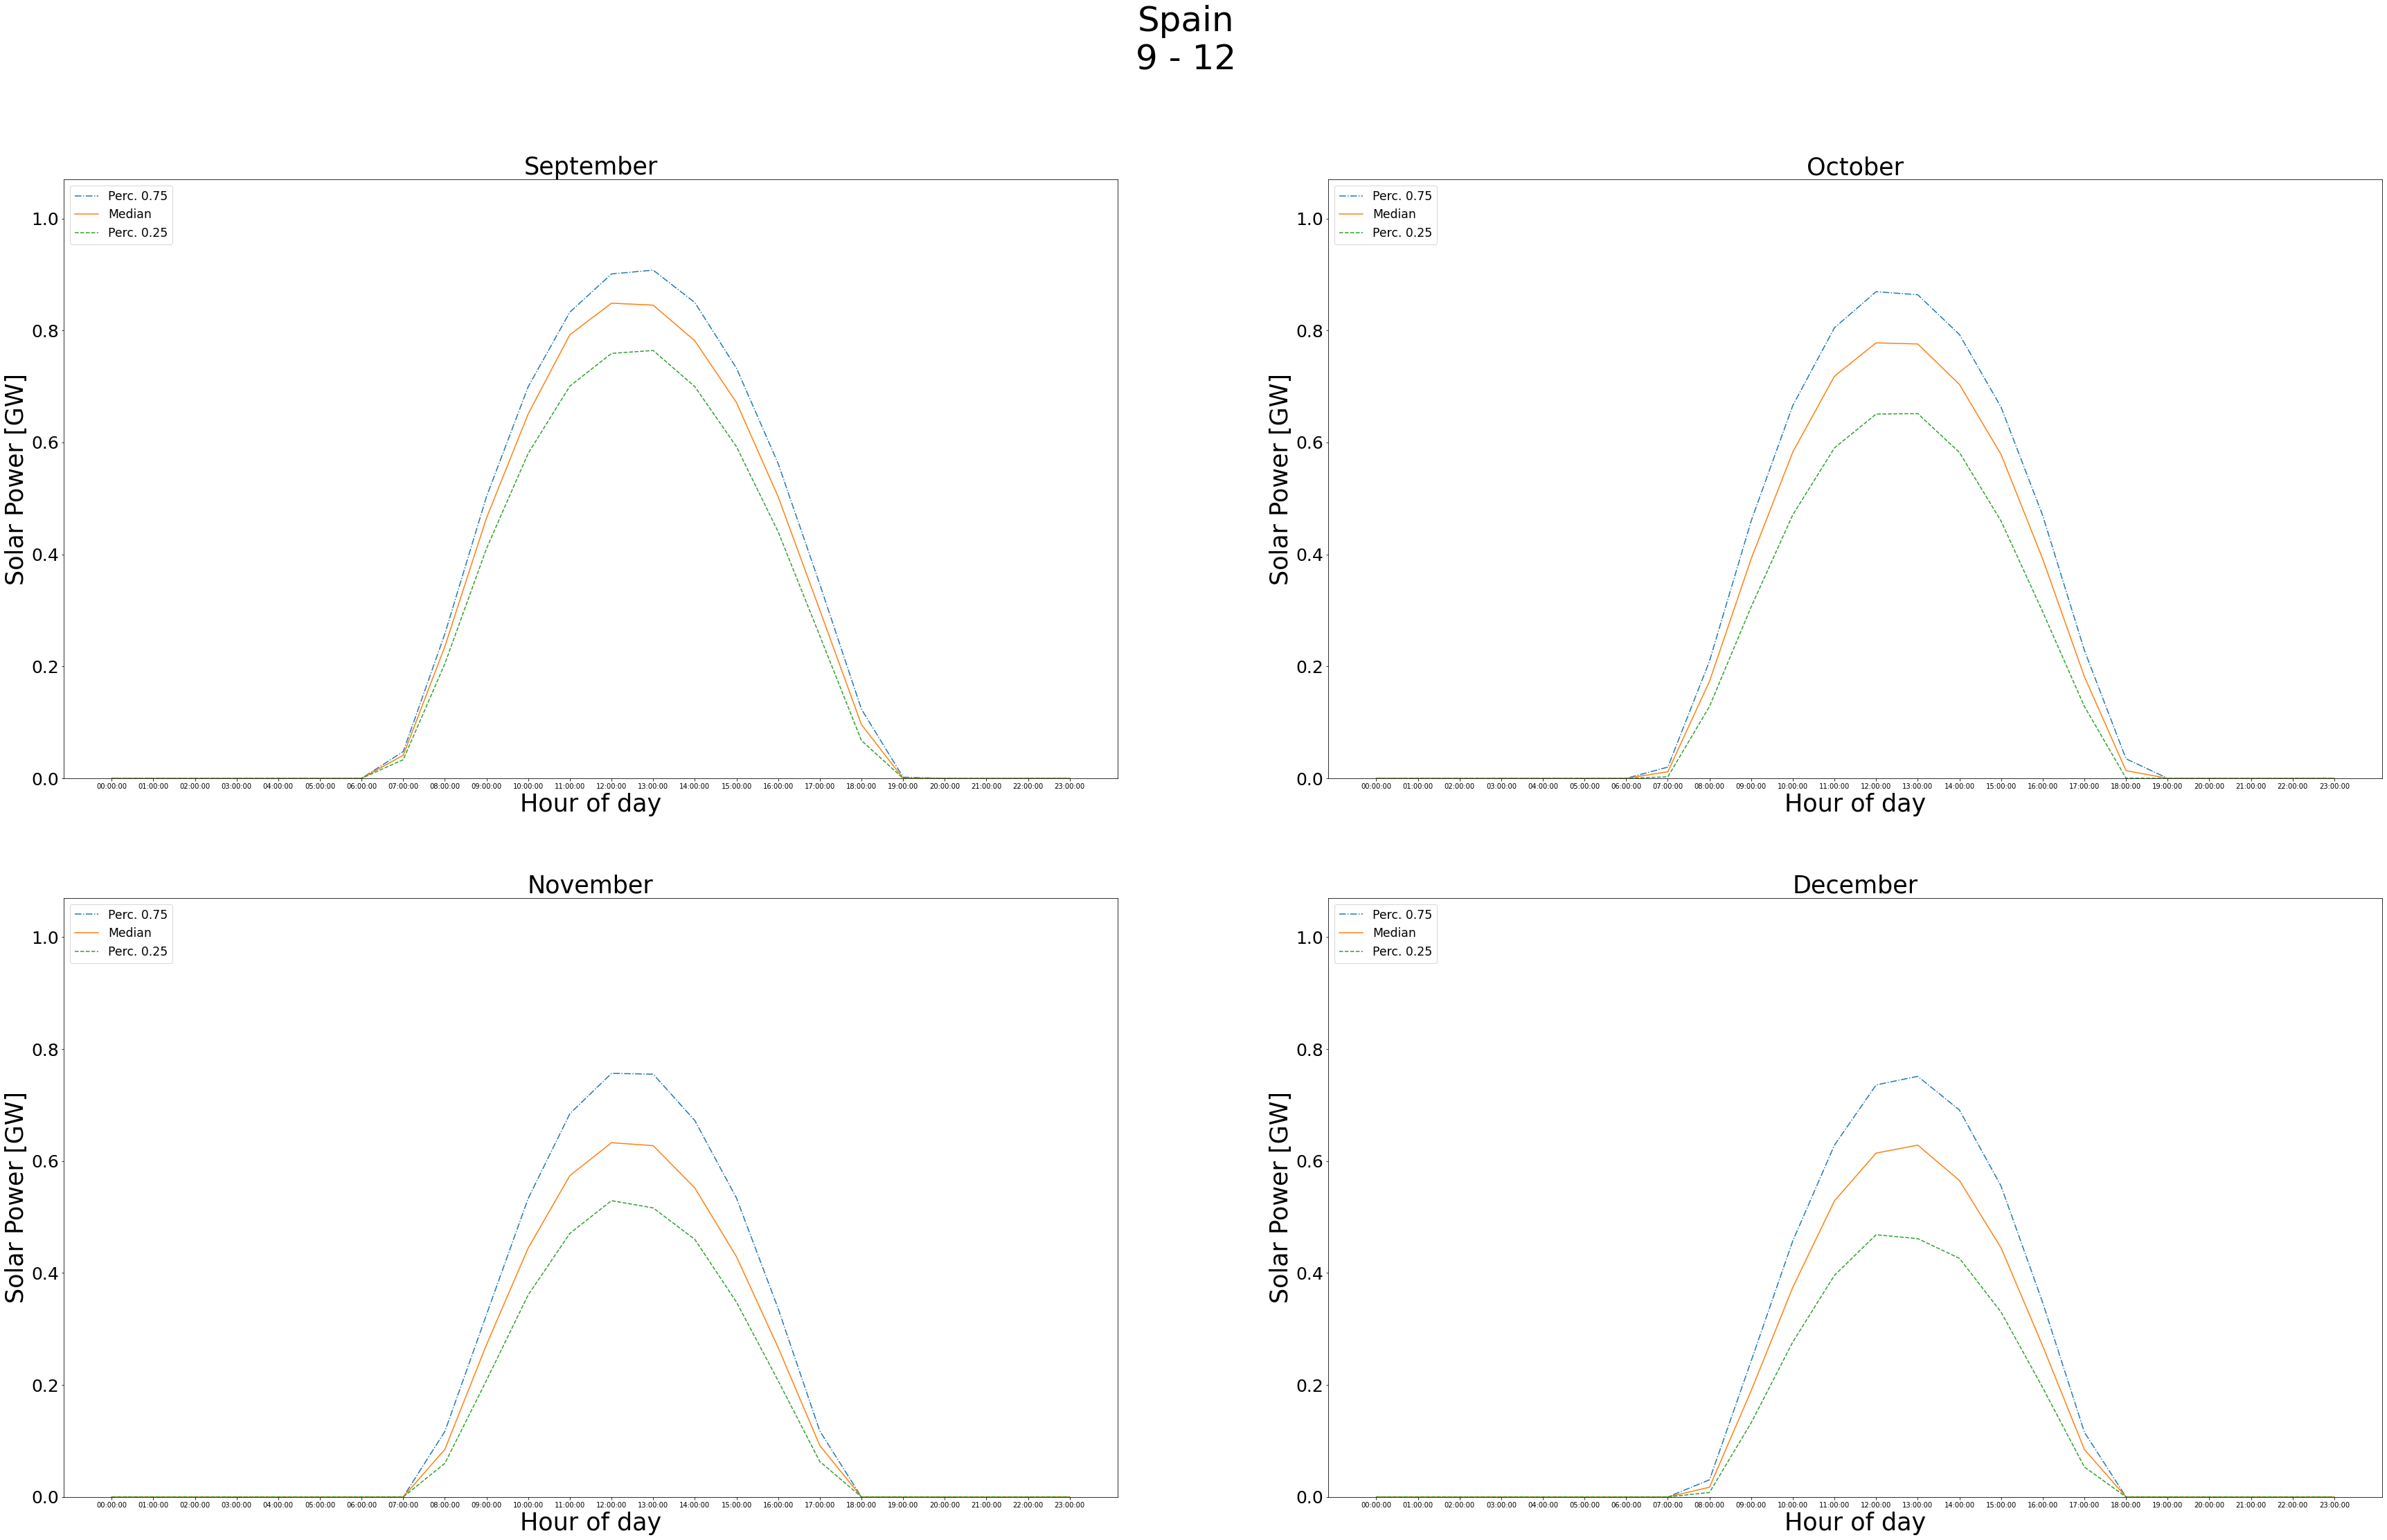

In [19]:
cuatrimestre(1,1,'Spain')
cuatrimestre(2,5,'Spain')
cuatrimestre(3,9,'Spain')

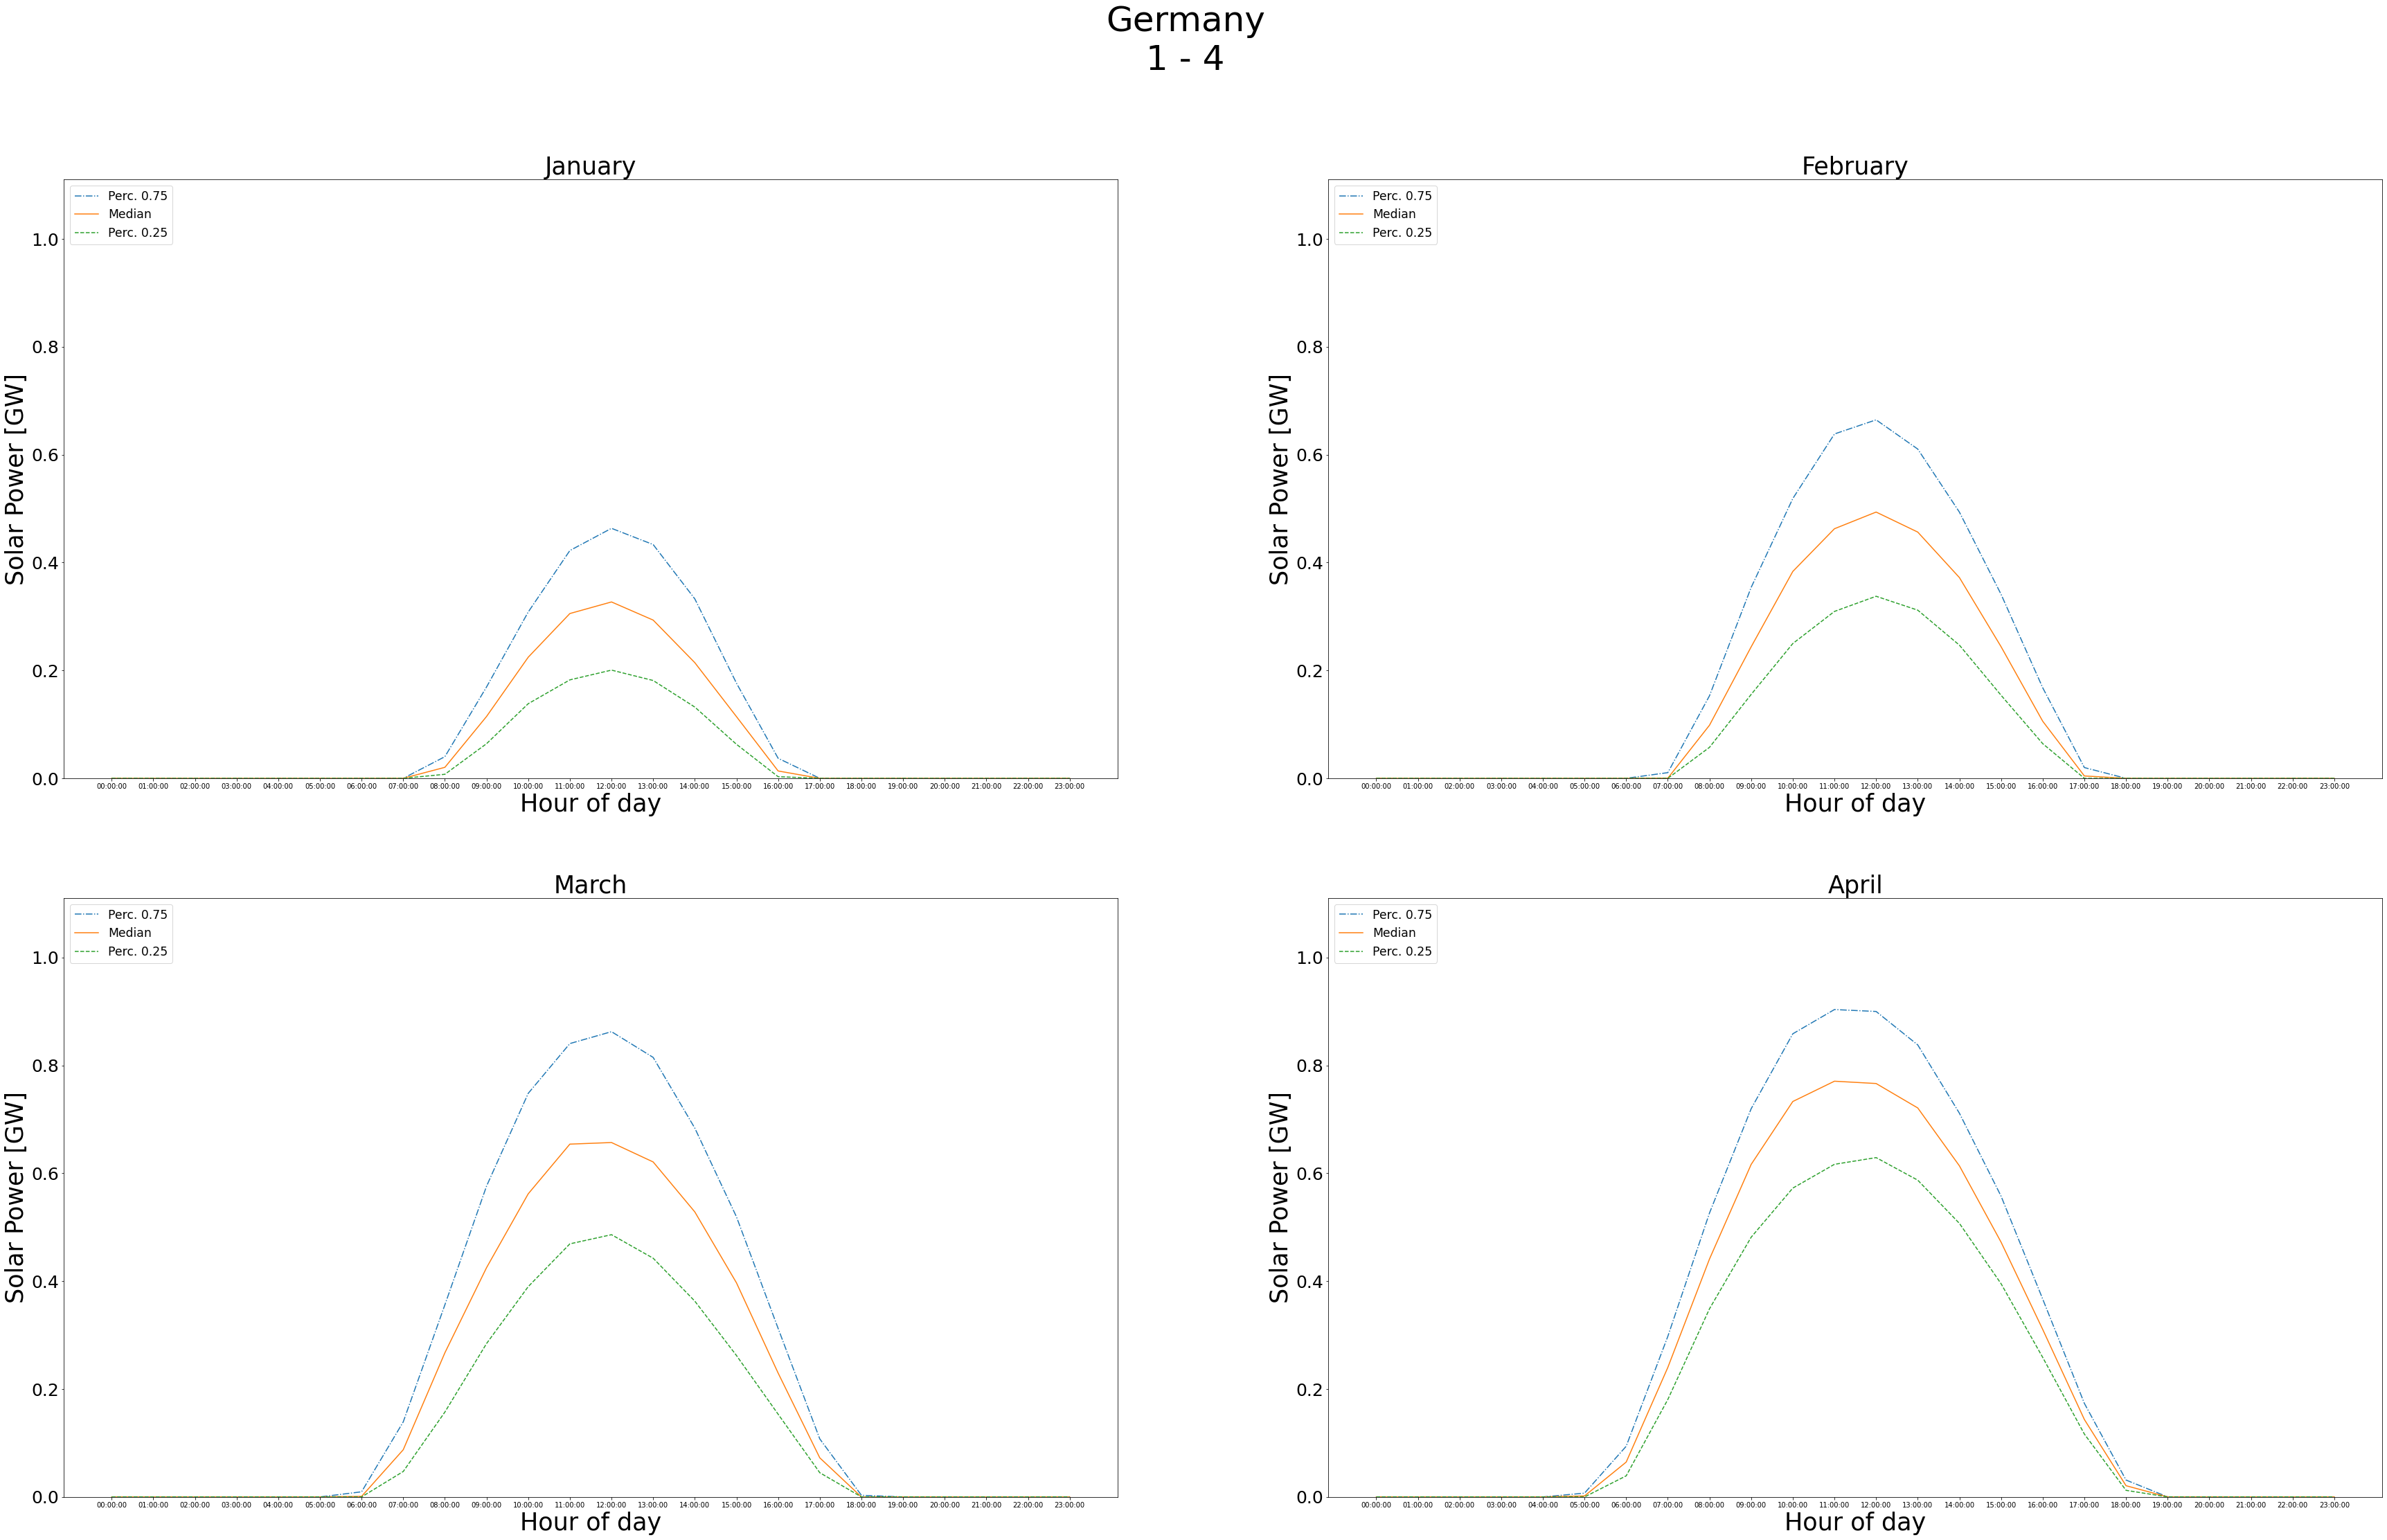

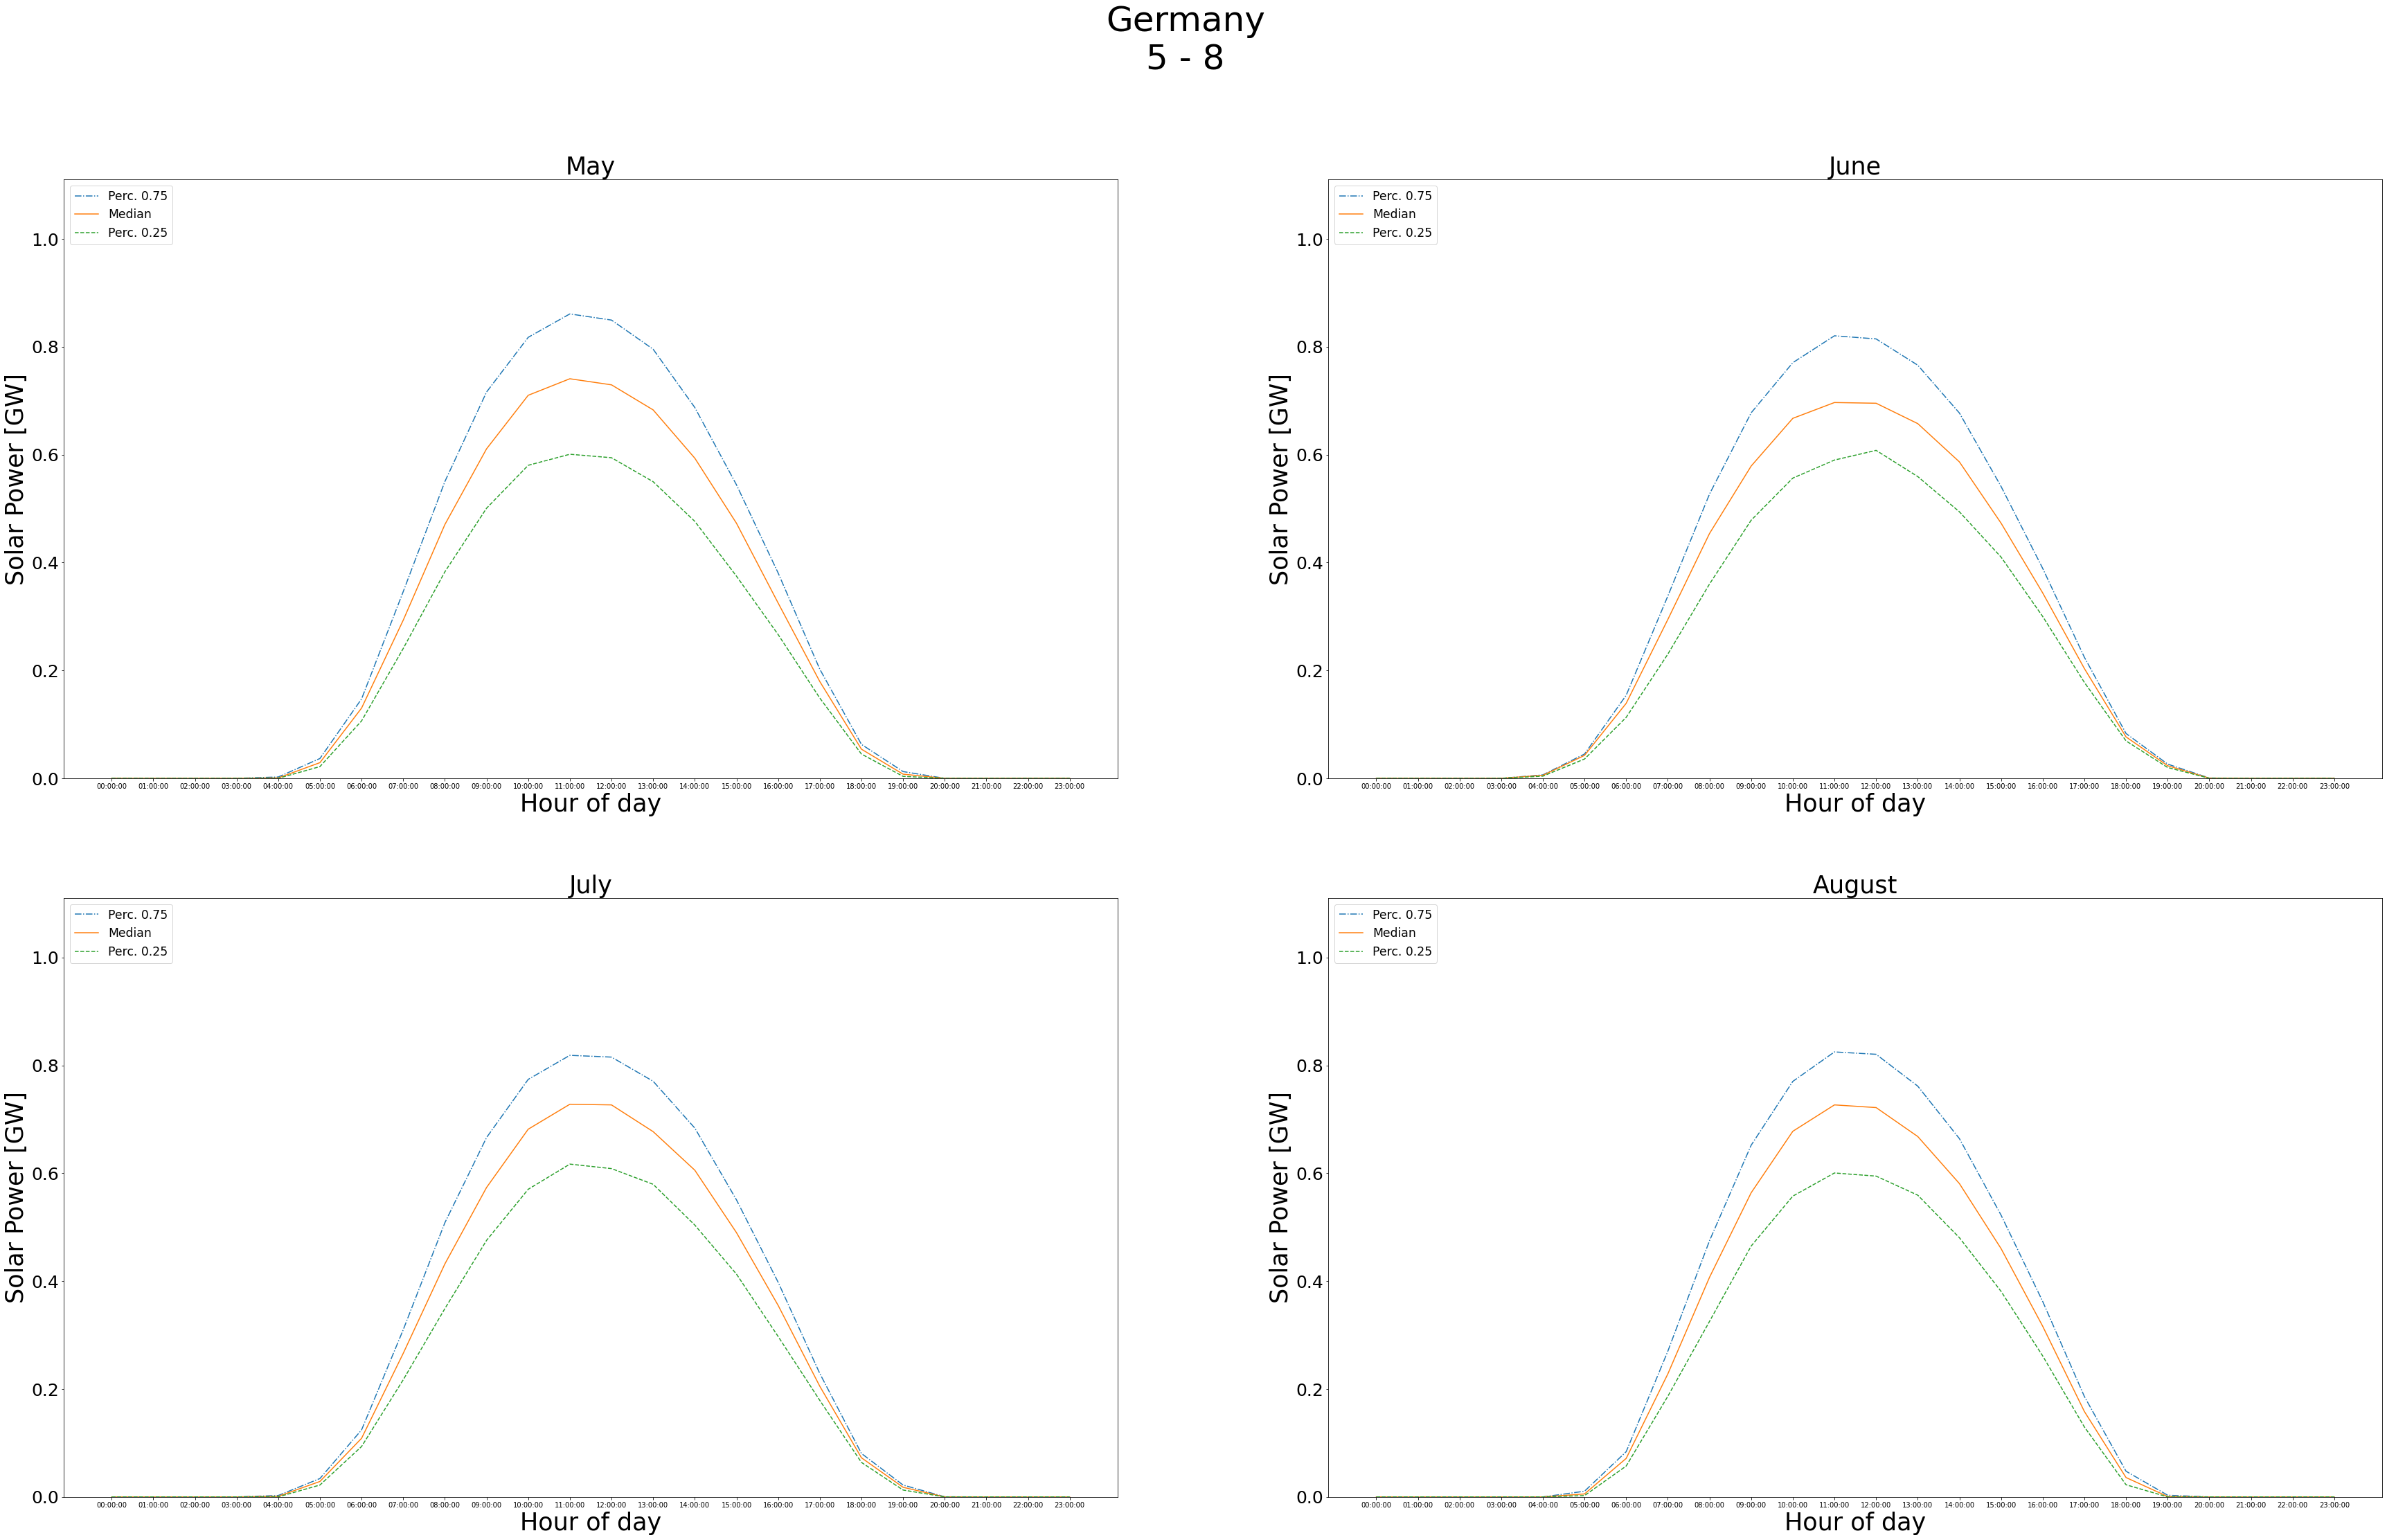

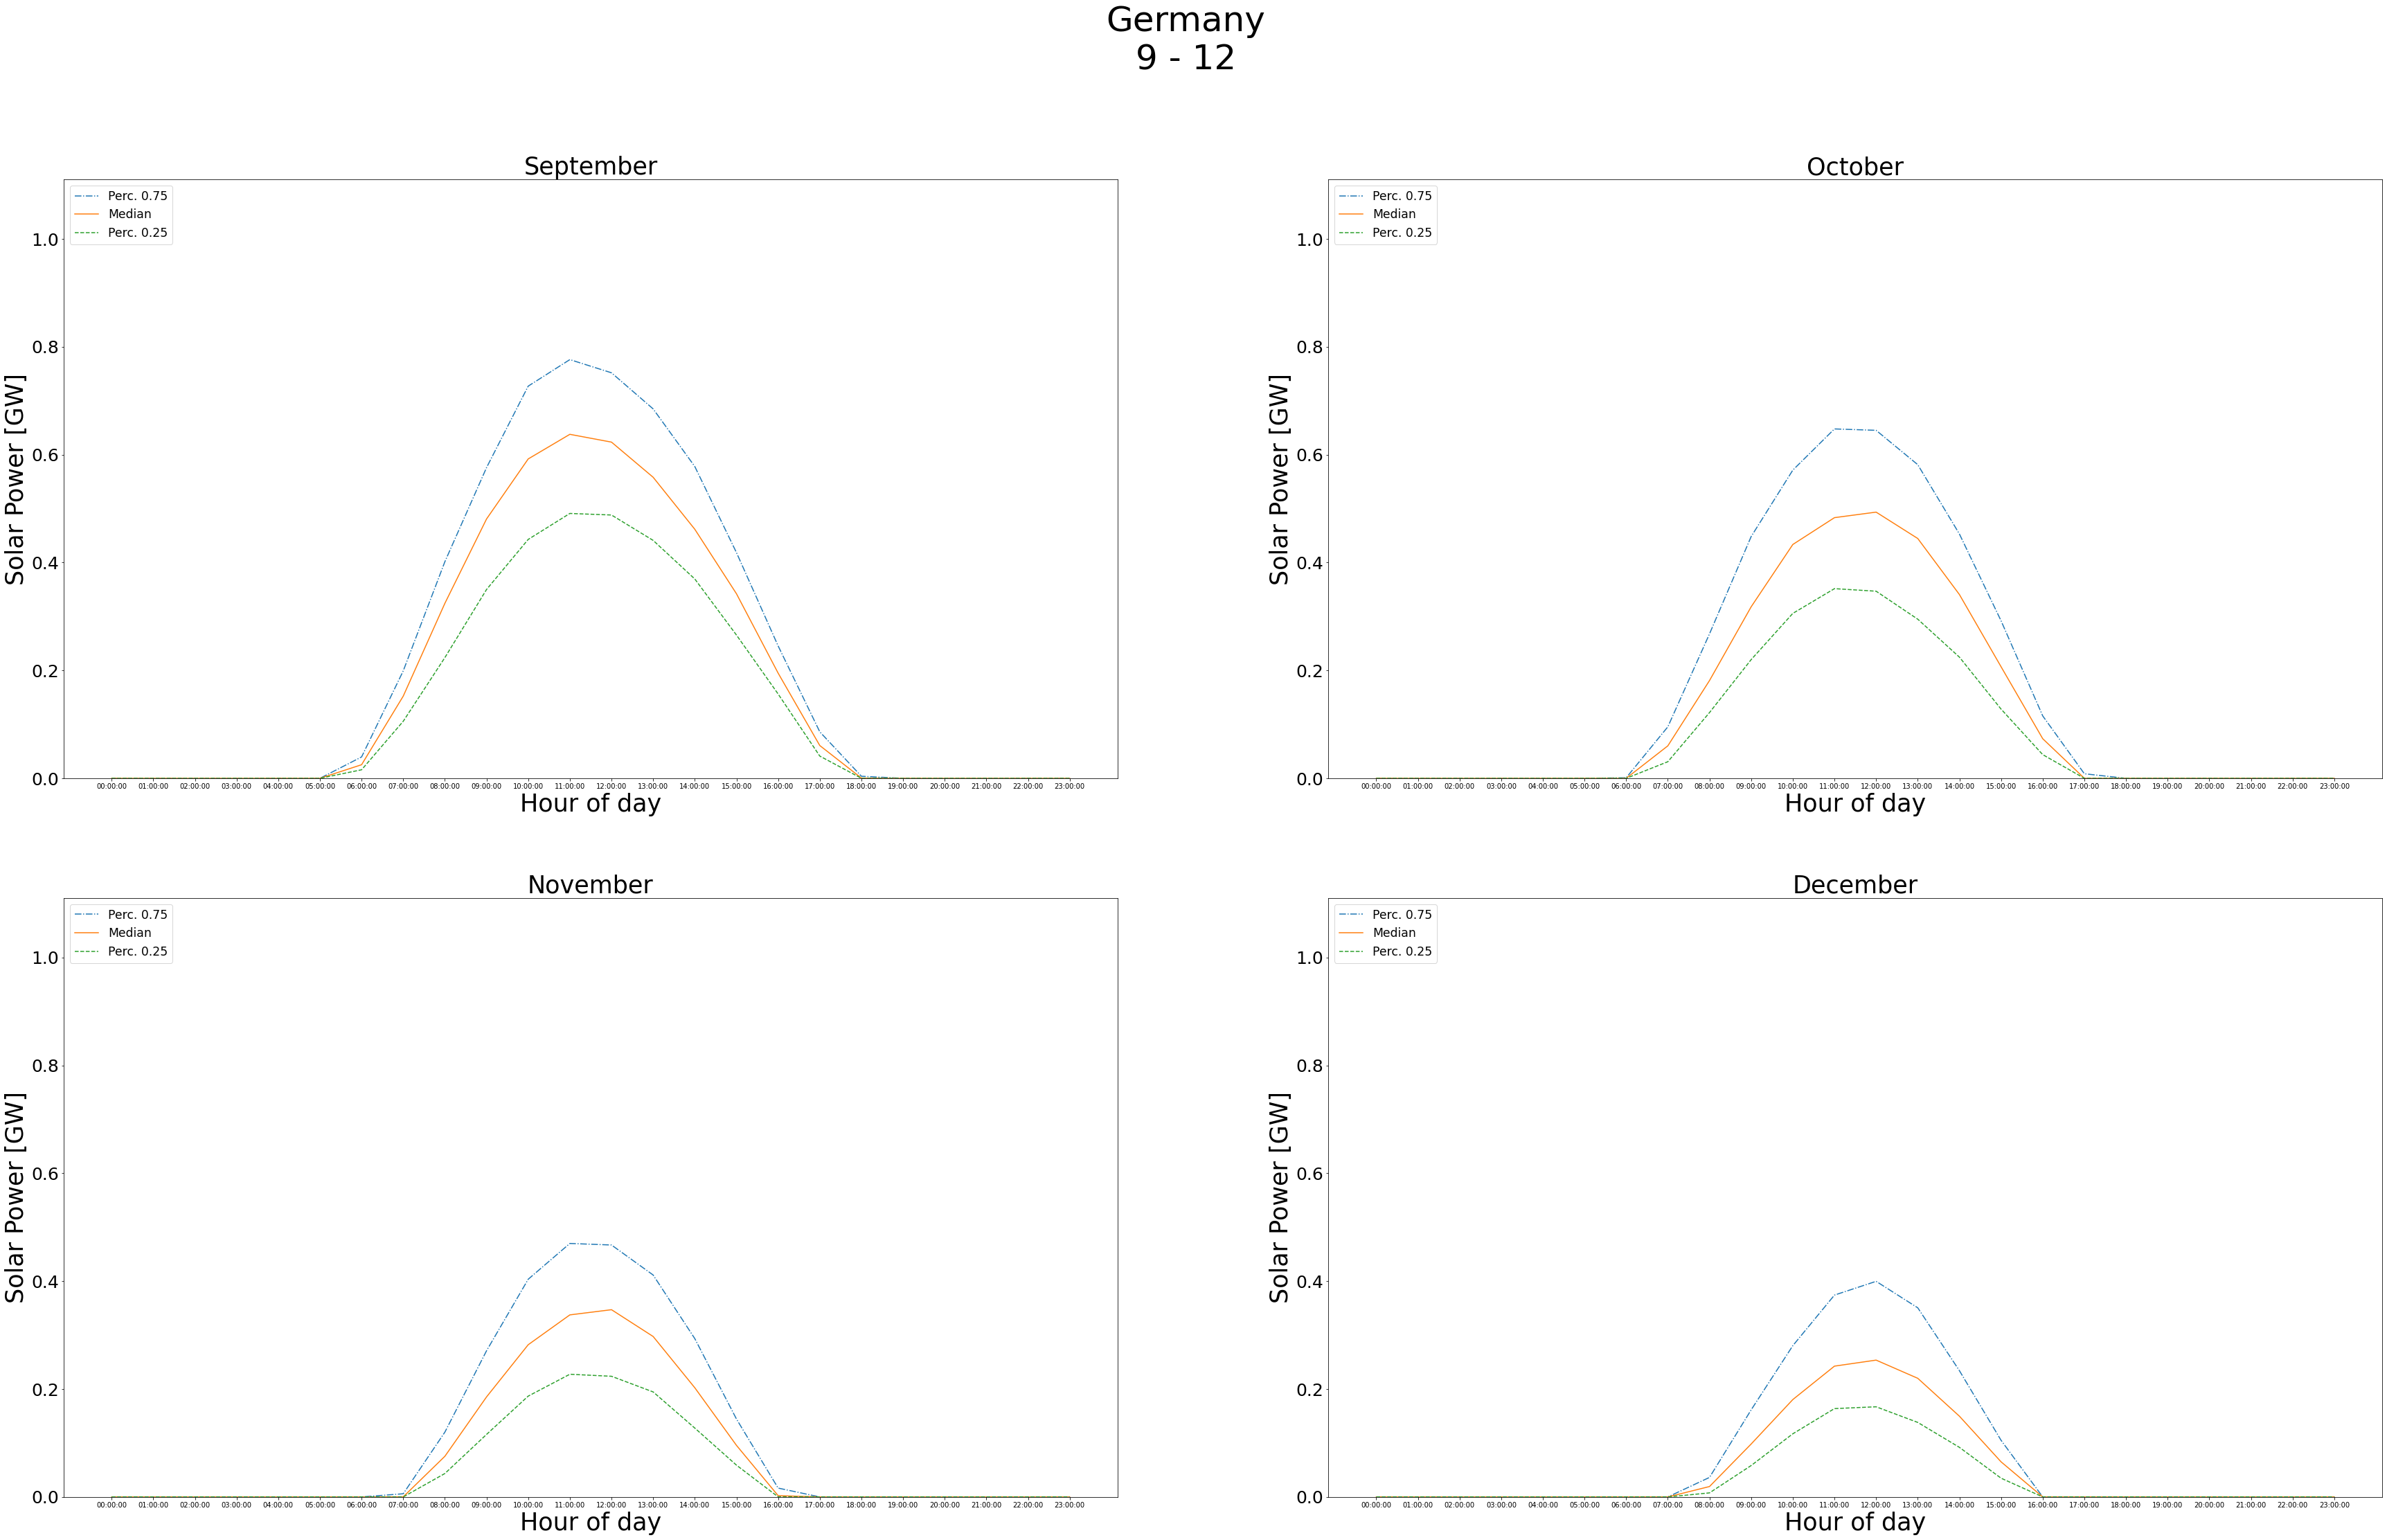

In [20]:
cuatrimestre(1,1,'Germany')
cuatrimestre(2,5,'Germany')
cuatrimestre(3,9,'Germany')

Mapas

Compute availability matrix: 100%|██████████| 1/1 [00:02<00:00,  2.76s/ gridcells]


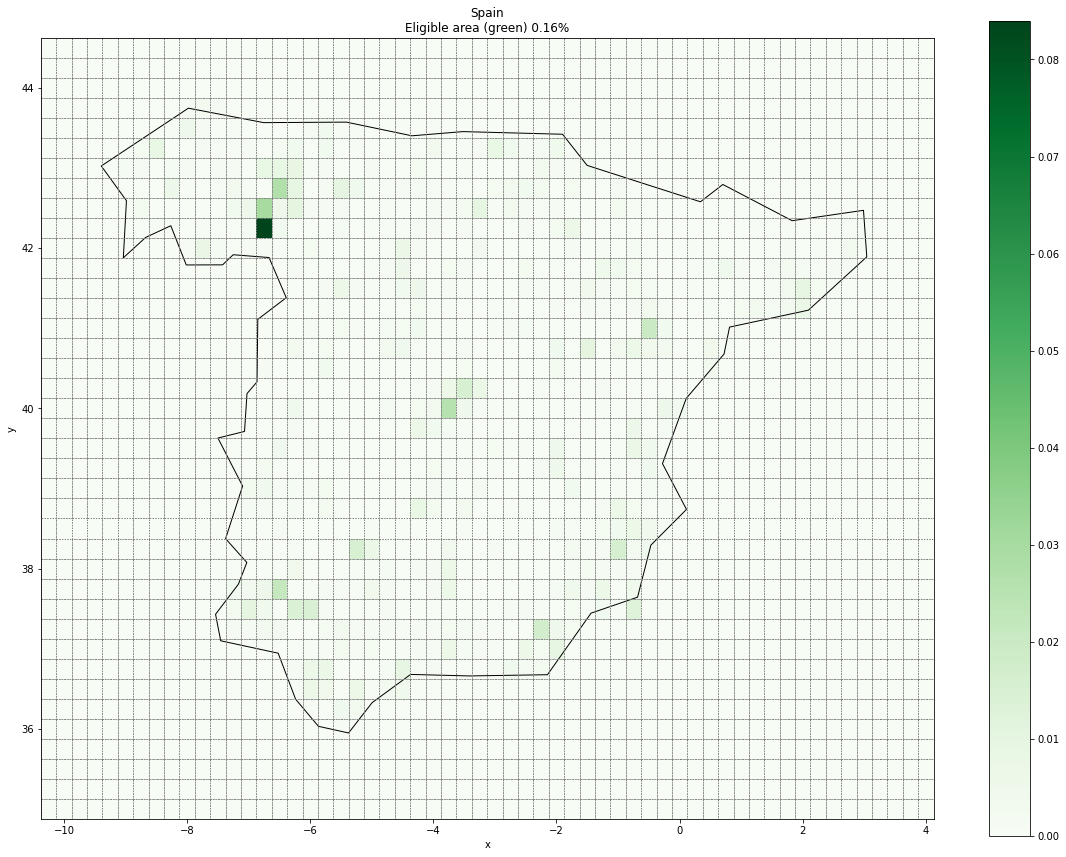

In [21]:
area_elegible('Spain',dump)

Compute availability matrix: 100%|██████████| 1/1 [00:01<00:00,  1.73s/ gridcells]


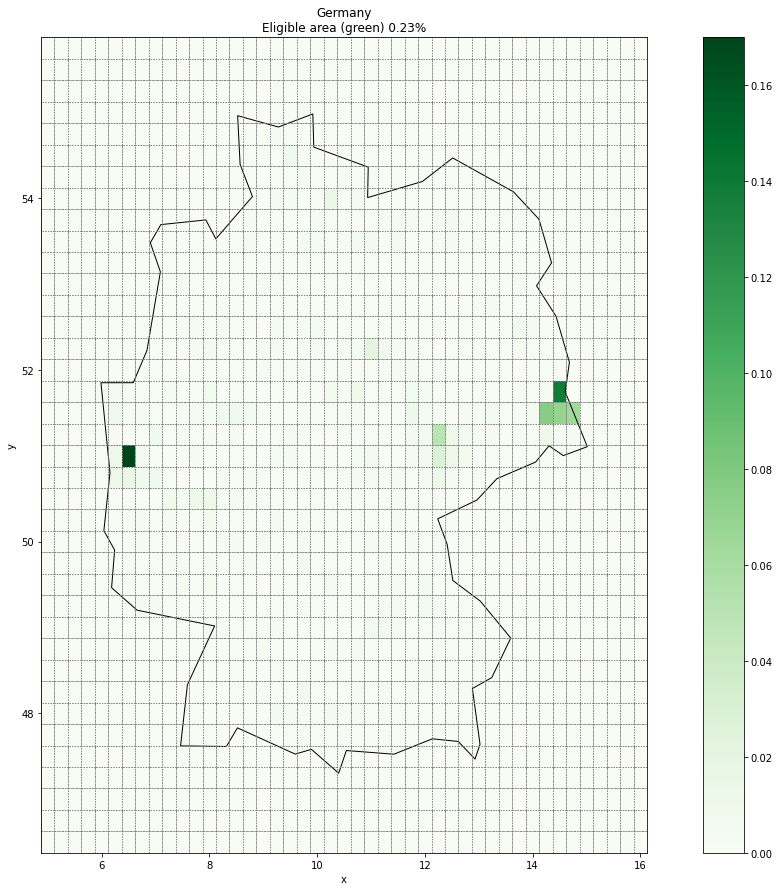

In [22]:
area_elegible('Germany',dump)